In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding="latin-1", usecols=["v1","v2"])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.rename(columns={"v1": "label","v2": "message"}, inplace = True)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["label"] = le.fit_transform(df["label"])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [7]:
df.duplicated().sum()

403

In [8]:
df = df.drop_duplicates(keep="first")

In [9]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df["label"].value_counts()

0    4516
1     653
Name: label, dtype: int64

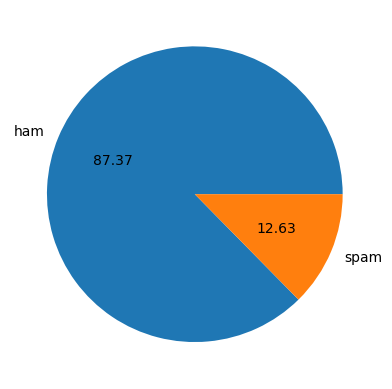

In [11]:
import matplotlib.pyplot as plt
plt.pie(df["label"].value_counts(),autopct = "%.2f", labels=['ham','spam'])
plt.show()

In [12]:
import re
import nltk
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [14]:
import pickle
import string
from nltk import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
# This Function helps to get Ready!!!

def data(text):
    text = text.lower()               #  Converts Text in Lower Case
    text = nltk.word_tokenize(text)   #  Breaks Text in Words

    y = []
    for i in text:
        if i.isalnum():               #  Removing Special Characters
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:                    #  Removing Stopwords and Punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:                    #  Porter Stemmer removing unwanted words
        y.append(ps.stem(i))

    return " ".join(y)

In [15]:
df["message"] = df["message"].apply(data)

In [16]:
df.head()

,label,message
0,0,go jurong point avail bugi n great world la e ...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


In [17]:
tfidv = TfidfVectorizer(max_features=3000)

In [18]:
X = tfidv.fit_transform(df["message"]).toarray()
y = df["label"].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [20]:
import sklearn
from sklearn.naive_bayes import GaussianNB,MultinomialNB
mnb = MultinomialNB()
spam_detect_model = mnb.fit(X_train,y_train)

In [21]:
spam_detect_model.fit(X_train, y_train)
y_pred = spam_detect_model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
cm,accuracy

(array([[896,   0],
        [ 28, 110]]),
 0.9729206963249516)

In [23]:
cr = classification_report(y_test,y_pred)

In [24]:
cr

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98       896\n           1       1.00      0.80      0.89       138\n\n    accuracy                           0.97      1034\n   macro avg       0.98      0.90      0.94      1034\nweighted avg       0.97      0.97      0.97      1034\n'